# Instructions
To run the notebook, select the kernel menu above and click "run all".  After that you should be able to scroll down and see an interactive plot with sliders that allows you to adjust the endpoint of the path and the number of segments.

### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from brachistochrone_files import *
np.set_printoptions(precision=6, suppress=True) 
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import IntSlider,FloatSlider,interact
import pandas as pd
# make sure to run: conda install nodejs the first time

### Define solution parameters
Change this if you want to see a specific case.

In [2]:
a=10 # x-coordinate for endpoint
b=-1  # y-coordinate for endpoint
N=4 # number of segments (must be integer)

###  Generate plots

<IPython.core.display.Javascript object>


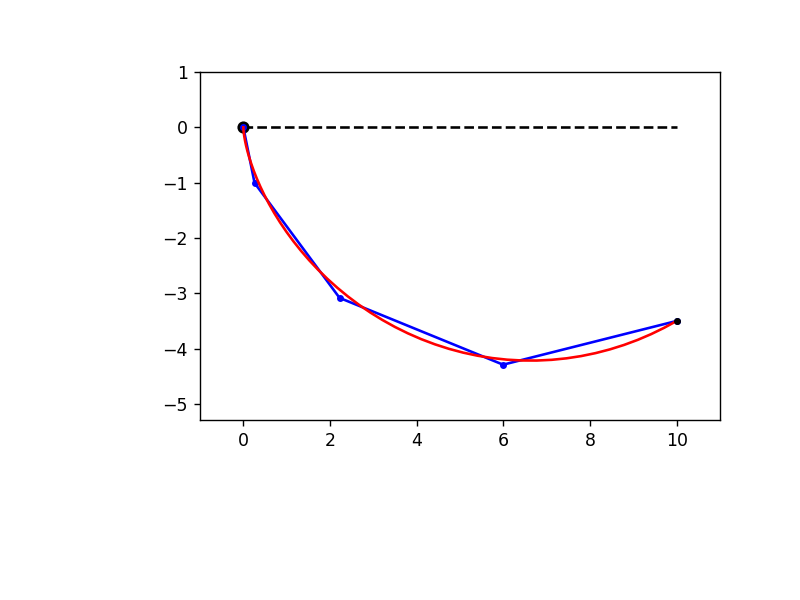

interactive(children=(FloatSlider(value=10.0, description='a', max=10.0), FloatSlider(value=-1.0, description=…

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.3)

x,y=compute_optimal_path(a,b,N)

theta_end,r=get_optimal_cycloid(a,b)
theta=np.linspace(0,theta_end)
x_cyc=r*(theta-np.sin(theta))
y_cyc=-r*(1-np.cos(theta))


l1,=plt.plot([0,a],[0,0],'--k')
l2,=plt.plot(x,y,'.b')
l3,=plt.plot(x,y,'-b')
l4,=plt.plot(x_cyc,y_cyc,'r')
plt.scatter(0,0,c='k')
l5,=plt.plot(a,b,'.k')
ax.set_aspect('equal')


def update(a=FloatSlider(description='a', step=0.1, min=0,max=10.0,value=a),
           b=FloatSlider(description='b', step=0.1, min=-10,max=0, value=b),
           N= IntSlider(description='N', step=1, min=1,max=20,value=N)):
    x,y=compute_optimal_path(a,b,N)

    theta_end,r=get_optimal_cycloid(a,b)
    theta=np.linspace(0,theta_end)
    x_cyc=r*(theta-np.sin(theta))
    y_cyc=-r*(1-np.cos(theta))


    l1.set_xdata([0,a])
    l1.set_ydata([0,0])
    l2.set_xdata(x)
    l2.set_ydata(y)
    l3.set_xdata(x)
    l3.set_ydata(y)
    l4.set_xdata(x_cyc)
    l4.set_ydata(y_cyc)
    
    l5.set_xdata(a)
    l5.set_ydata(b)
    ax.set_xlim(x.min()-1,x.max()+1)
    ax.set_ylim(y.min()-1,y.max()+1)
    #print("Travel Times:",travel_times(x,y))
    #print("x-coordinates:",x)
    #print("y-coordinates:",y)
    res=pd.DataFrame()
    res['initial x']=x[:-1]
    res['initial y']=y[:-1]
    res['final x']=x[1:]
    res['final y']=y[1:]
    res['initial velocity']=np.sqrt(-2*9.8*y[:-1])
    res['final velocity']=np.sqrt(-2*9.8*y[1:])
    res['time-averaged velocity']=(res['initial velocity']+res['final velocity'])/2
    res['travel time']=travel_times(x,y)
    res['length']=np.sqrt(np.diff(x)**2+np.diff(y)**2)
    res['angle from vertical (deg)']=np.arctan(np.diff(x)/np.diff(y))*180/np.pi
    
    angle_w_prev = lambda x,y,k: np.arcos(np.array([x[k-1]-x[k],y[k-1]-y[k]]))
    res['angle with previous side (deg)']=angles_with_previous(x,y)
    display(res)
    fig.canvas.draw_idle()
    
interact(update)
plt.show()

### Click the sliders above to update the figure and table.